In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,SGDRegressor
from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
%matplotlib inline

In [85]:
data = pd.read_csv("AirQualityUCI.csv")
data

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,3/10/2004,18:00:00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,NaN,NaN
1,3/10/2004,19:00:00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,NaN,NaN
2,3/10/2004,20:00:00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,NaN,NaN
3,3/10/2004,21:00:00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,NaN,NaN
4,3/10/2004,22:00:00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9469,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [86]:
data = data.drop(["Date", "Time","Unnamed: 15","Unnamed: 16" ], axis=1) # Removing unnecessary columns
data

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9469,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [87]:
data = data.dropna() # Removing NaN values
data

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,3.1,1314.0,-200.0,13.5,1101.0,472.0,539.0,190.0,1374.0,1729.0,21.9,29.3,0.7568
9353,2.4,1163.0,-200.0,11.4,1027.0,353.0,604.0,179.0,1264.0,1269.0,24.3,23.7,0.7119
9354,2.4,1142.0,-200.0,12.4,1063.0,293.0,603.0,175.0,1241.0,1092.0,26.9,18.3,0.6406
9355,2.1,1003.0,-200.0,9.5,961.0,235.0,702.0,156.0,1041.0,770.0,28.3,13.5,0.5139


In [88]:
data.describe()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
mean,-34.207524,1048.990061,-159.090093,1.865683,894.595276,168.616971,794.990168,58.148873,1391.479641,975.072032,9.778305,39.485380,-6.837604
std,77.657170,329.832710,139.789093,41.380206,342.333252,257.433866,321.993552,126.940455,467.210125,456.938184,43.203623,51.216145,38.976670
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000
25%,0.600000,921.000000,-200.000000,4.000000,711.000000,50.000000,637.000000,53.000000,1185.000000,700.000000,10.900000,34.100000,0.692300
50%,1.500000,1053.000000,-200.000000,7.900000,895.000000,141.000000,794.000000,96.000000,1446.000000,942.000000,17.200000,48.600000,0.976800
75%,2.600000,1221.000000,-200.000000,13.600000,1105.000000,284.000000,960.000000,133.000000,1662.000000,1255.000000,24.100000,61.900000,1.296200
max,11.900000,2040.000000,1189.000000,63.700000,2214.000000,1479.000000,2683.000000,340.000000,2775.000000,2523.000000,44.600000,88.700000,2.231000


array([[<Axes: title={'center': 'CO(GT)'}>,
        <Axes: title={'center': 'PT08.S1(CO)'}>,
        <Axes: title={'center': 'NMHC(GT)'}>,
        <Axes: title={'center': 'C6H6(GT)'}>],
       [<Axes: title={'center': 'PT08.S2(NMHC)'}>,
        <Axes: title={'center': 'NOx(GT)'}>,
        <Axes: title={'center': 'PT08.S3(NOx)'}>,
        <Axes: title={'center': 'NO2(GT)'}>],
       [<Axes: title={'center': 'PT08.S4(NO2)'}>,
        <Axes: title={'center': 'PT08.S5(O3)'}>,
        <Axes: title={'center': 'T'}>, <Axes: title={'center': 'RH'}>],
       [<Axes: title={'center': 'AH'}>, <Axes: >, <Axes: >, <Axes: >]],
      dtype=object)

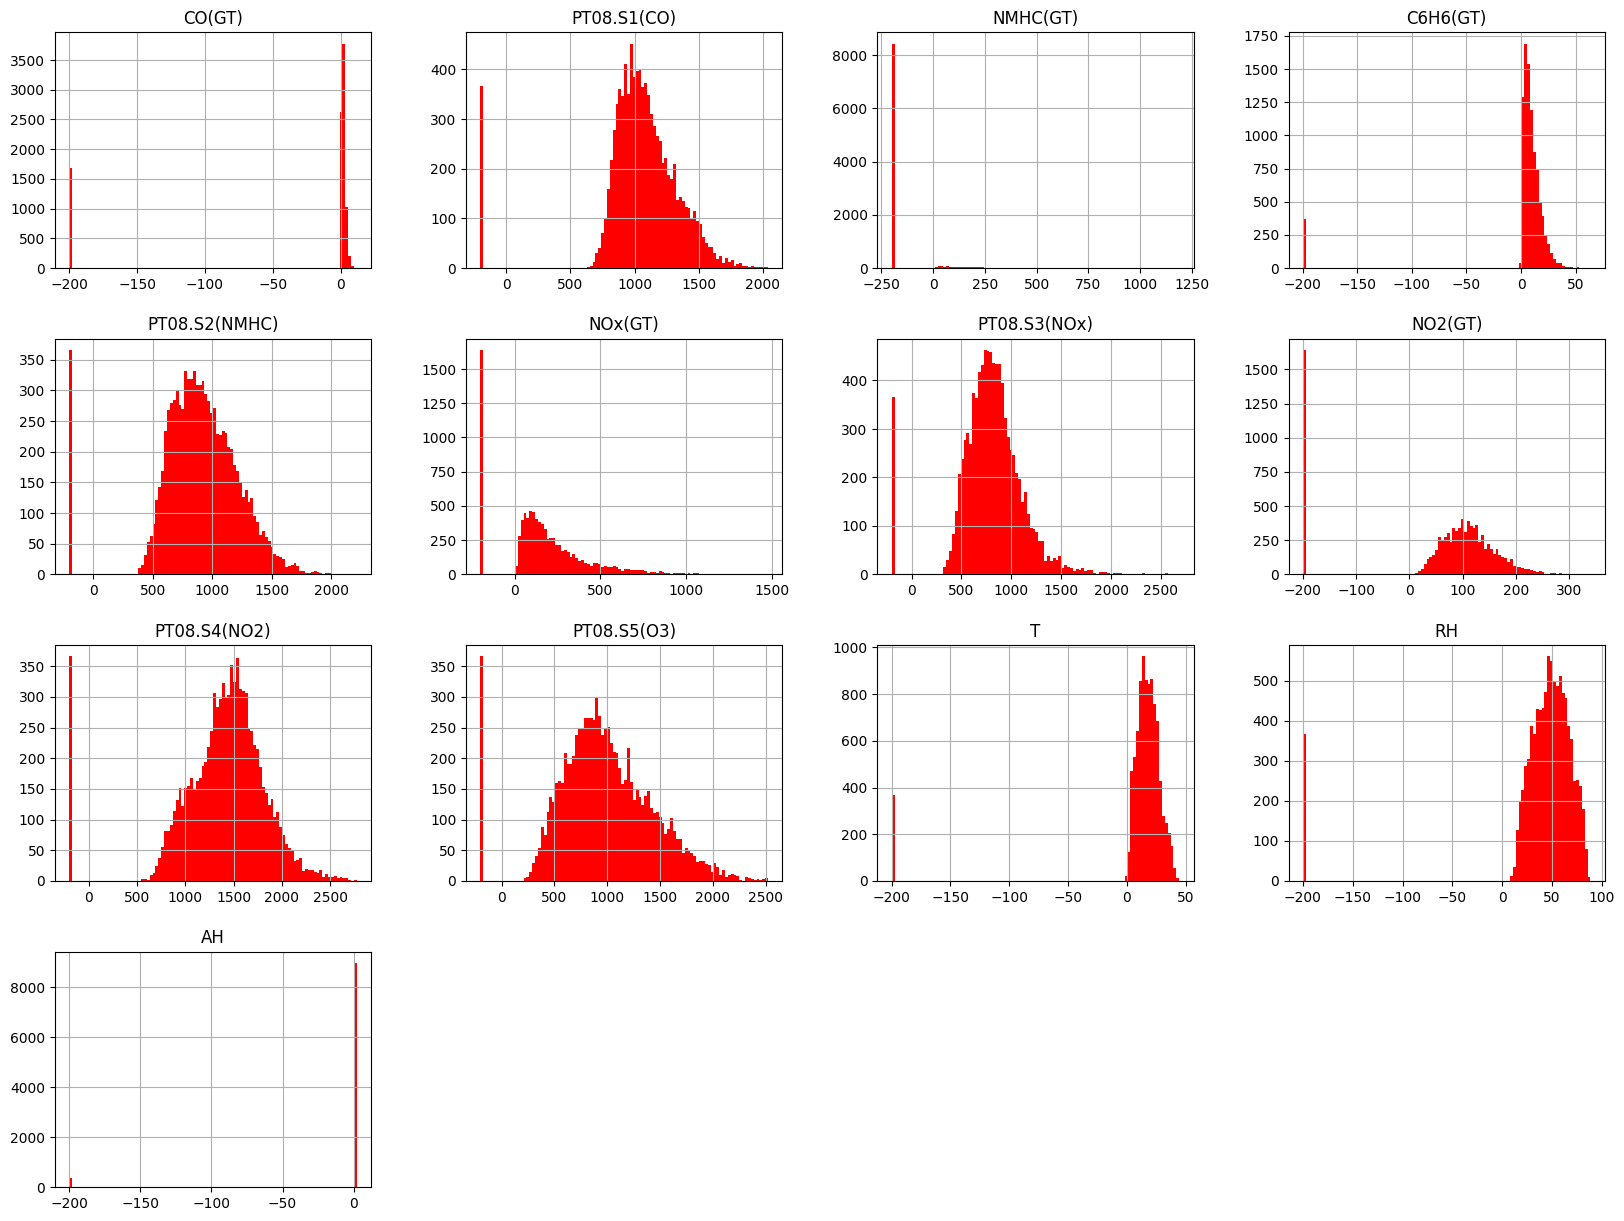

In [89]:
data.hist(bins = 100, color= "red", figsize=(20,15))

In [90]:
attributes = ["CO(GT)","PT08.S1(CO)", "NMHC(GT)",	"C6H6(GT)","PT08.S2(NMHC)",	"NOx(GT)","AH"]
data.corr()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
CO(GT),1.000000,0.041411,0.128351,-0.031378,0.029926,0.526451,-0.089981,0.671127,-0.073724,0.080310,-0.068939,-0.048227,-0.045892
PT08.S1(CO),0.041411,1.000000,0.170007,0.852687,0.933102,0.277993,0.087019,0.154030,0.845149,0.892434,0.754844,0.745375,0.764903
NMHC(GT),0.128351,0.170007,1.000000,0.037323,0.110104,-0.004427,0.048821,0.103307,0.162680,0.101185,-0.000009,0.008284,0.012500
C6H6(GT),-0.031378,0.852687,0.037323,1.000000,0.767433,-0.001174,0.512193,-0.010992,0.774673,0.641334,0.971375,0.925062,0.984555
PT08.S2(NMHC),0.029926,0.933102,0.110104,0.767433,1.000000,0.331272,-0.073667,0.176488,0.874782,0.909905,0.669025,0.585803,0.646572
NOx(GT),0.526451,0.277993,-0.004427,-0.001174,0.331272,1.000000,-0.436084,0.817139,0.035546,0.461889,-0.138452,-0.053009,-0.095847
PT08.S3(NOx),-0.089981,0.087019,0.048821,0.512193,-0.073667,-0.436084,1.000000,-0.256232,0.122734,-0.208865,0.588111,0.573549,0.621618
NO2(GT),0.671127,0.154030,0.103307,-0.010992,0.176488,0.817139,-0.256232,1.000000,-0.022174,0.253439,-0.084104,-0.081305,-0.060440
PT08.S4(NO2),-0.073724,0.845149,0.162680,0.774673,0.874782,0.035546,0.122734,-0.022174,1.000000,0.723690,0.755060,0.640707,0.691913
PT08.S5(O3),0.080310,0.892434,0.101185,0.641334,0.909905,0.461889,-0.208865,0.253439,0.723690,1.000000,0.503700,0.524955,0.519467


In [91]:

data[data < 0] = np.nan
# Calculate column means, ignoring NaN values
column_means = data.mean()
# Replace NaN values with their respective column means
data = data.fillna(column_means)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9357 entries, 0 to 9356
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CO(GT)         9357 non-null   float64
 1   PT08.S1(CO)    9357 non-null   float64
 2   NMHC(GT)       9357 non-null   float64
 3   C6H6(GT)       9357 non-null   float64
 4   PT08.S2(NMHC)  9357 non-null   float64
 5   NOx(GT)        9357 non-null   float64
 6   PT08.S3(NOx)   9357 non-null   float64
 7   NO2(GT)        9357 non-null   float64
 8   PT08.S4(NO2)   9357 non-null   float64
 9   PT08.S5(O3)    9357 non-null   float64
 10  T              9357 non-null   float64
 11  RH             9357 non-null   float64
 12  AH             9357 non-null   float64
dtypes: float64(13)
memory usage: 1023.4 KB


C:\Users\Dell\AppData\Local\Temp\ipykernel_1236\3144388686.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[data < 0] = np.nan
C:\Users\Dell\AppData\Local\Temp\ipykernel_1236\3144388686.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[data < 0] = np.nan


In [138]:
data["CO(GT)"][data["CO(GT)"].argmax()]
# max value of CO(GT) is 11.9 in dataset, so we can add limit to 30
data["PT08.S1(CO)"][data["PT08.S1(CO)"].argmax()]
# min value of PT08.S1(CO) is 647 and max is 2040
data["NMHC(GT)"][data["NMHC(GT)"].argmax()]
# min value of NMHC(GT) is 7 and max is 1189
data["C6H6(GT)"][data["C6H6(GT)"].argmax()]
# min value of C6H6(GT) is 0.1 and max is 63.7
data["PT08.S2(NMHC)"][data["PT08.S2(NMHC)"].argmax()]
# min value of  PT08.S2(NMHC) is 383 and max value is 2214
data["NOx(GT)"][data["NOx(GT)"].argmax()]
# min value of NOx(GT) is 2 and max value is 1479
data["PT08.S3(NOx)"][data["PT08.S3(NOx)"].argmax()]
# min value of PT08.S3(NOx is 322 and max value is PT08.S3(NOx) is 2683
data["NO2(GT)"][data["NO2(GT)"].argmax()]
# min value is of NO2(GT) is 2 and max is 340
data["PT08.S4(NO2)"][data["PT08.S4(NO2)"].argmax()]
# min val of PT08.S4(NO2) is 551 and max is 2275.
data["PT08.S5(O3)"][data["PT08.S5(O3)"].argmax()]
# min value of PT08.S5(O3) is 221 and max val is 2523
data["T"][data["T"].argmax()]
# min value of T is 0 and max is 44.6
data["AH"][data["AH"].argmax()] 
# min value of AH is 0.1847 and max is 2.231

2.231

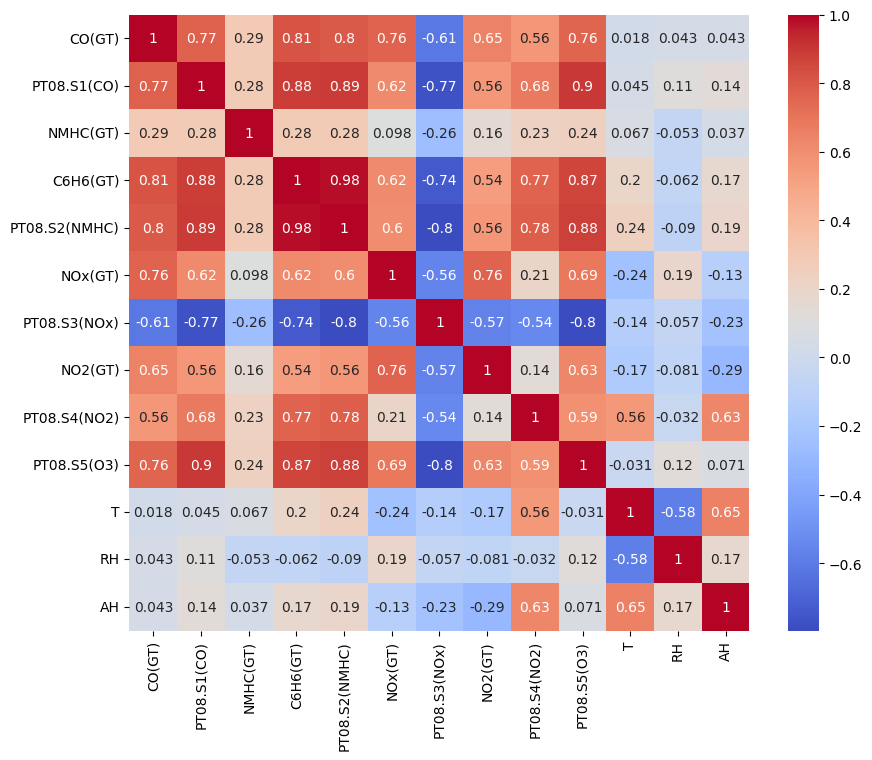

CO(GT)           0.043198
PT08.S1(CO)      0.114606
NMHC(GT)        -0.052784
C6H6(GT)        -0.061681
PT08.S2(NMHC)   -0.090380
NOx(GT)          0.192587
PT08.S3(NOx)    -0.056740
NO2(GT)         -0.080569
PT08.S4(NO2)    -0.032188
PT08.S5(O3)      0.124956
T               -0.581778
RH               1.000000
AH               0.167971
Name: RH, dtype: float64

In [92]:
corr_matrix = data.corr()
plt.figure(figsize=(10,8))
sn.heatmap(corr_matrix, annot=True,cmap='coolwarm')
plt.show()
corr_matrix["RH"]

In [93]:
corr_matrix = data.corr()

CO(GT)           0.043198
PT08.S1(CO)      0.114606
NMHC(GT)        -0.052784
C6H6(GT)        -0.061681
PT08.S2(NMHC)   -0.090380
NOx(GT)          0.192587
PT08.S3(NOx)    -0.056740
NO2(GT)         -0.080569
PT08.S4(NO2)    -0.032188
PT08.S5(O3)      0.124956
T               -0.581778
RH               1.000000
AH               0.167971
Name: RH, dtype: float64

array([[<Axes: xlabel='C6H6(GT)', ylabel='C6H6(GT)'>,
        <Axes: xlabel='NO2(GT)', ylabel='C6H6(GT)'>,
        <Axes: xlabel='T', ylabel='C6H6(GT)'>,
        <Axes: xlabel='AH', ylabel='C6H6(GT)'>,
        <Axes: xlabel='RH', ylabel='C6H6(GT)'>],
       [<Axes: xlabel='C6H6(GT)', ylabel='NO2(GT)'>,
        <Axes: xlabel='NO2(GT)', ylabel='NO2(GT)'>,
        <Axes: xlabel='T', ylabel='NO2(GT)'>,
        <Axes: xlabel='AH', ylabel='NO2(GT)'>,
        <Axes: xlabel='RH', ylabel='NO2(GT)'>],
       [<Axes: xlabel='C6H6(GT)', ylabel='T'>,
        <Axes: xlabel='NO2(GT)', ylabel='T'>,
        <Axes: xlabel='T', ylabel='T'>, <Axes: xlabel='AH', ylabel='T'>,
        <Axes: xlabel='RH', ylabel='T'>],
       [<Axes: xlabel='C6H6(GT)', ylabel='AH'>,
        <Axes: xlabel='NO2(GT)', ylabel='AH'>,
        <Axes: xlabel='T', ylabel='AH'>,
        <Axes: xlabel='AH', ylabel='AH'>,
        <Axes: xlabel='RH', ylabel='AH'>],
       [<Axes: xlabel='C6H6(GT)', ylabel='RH'>,
        <Axes: xlabel='NO2

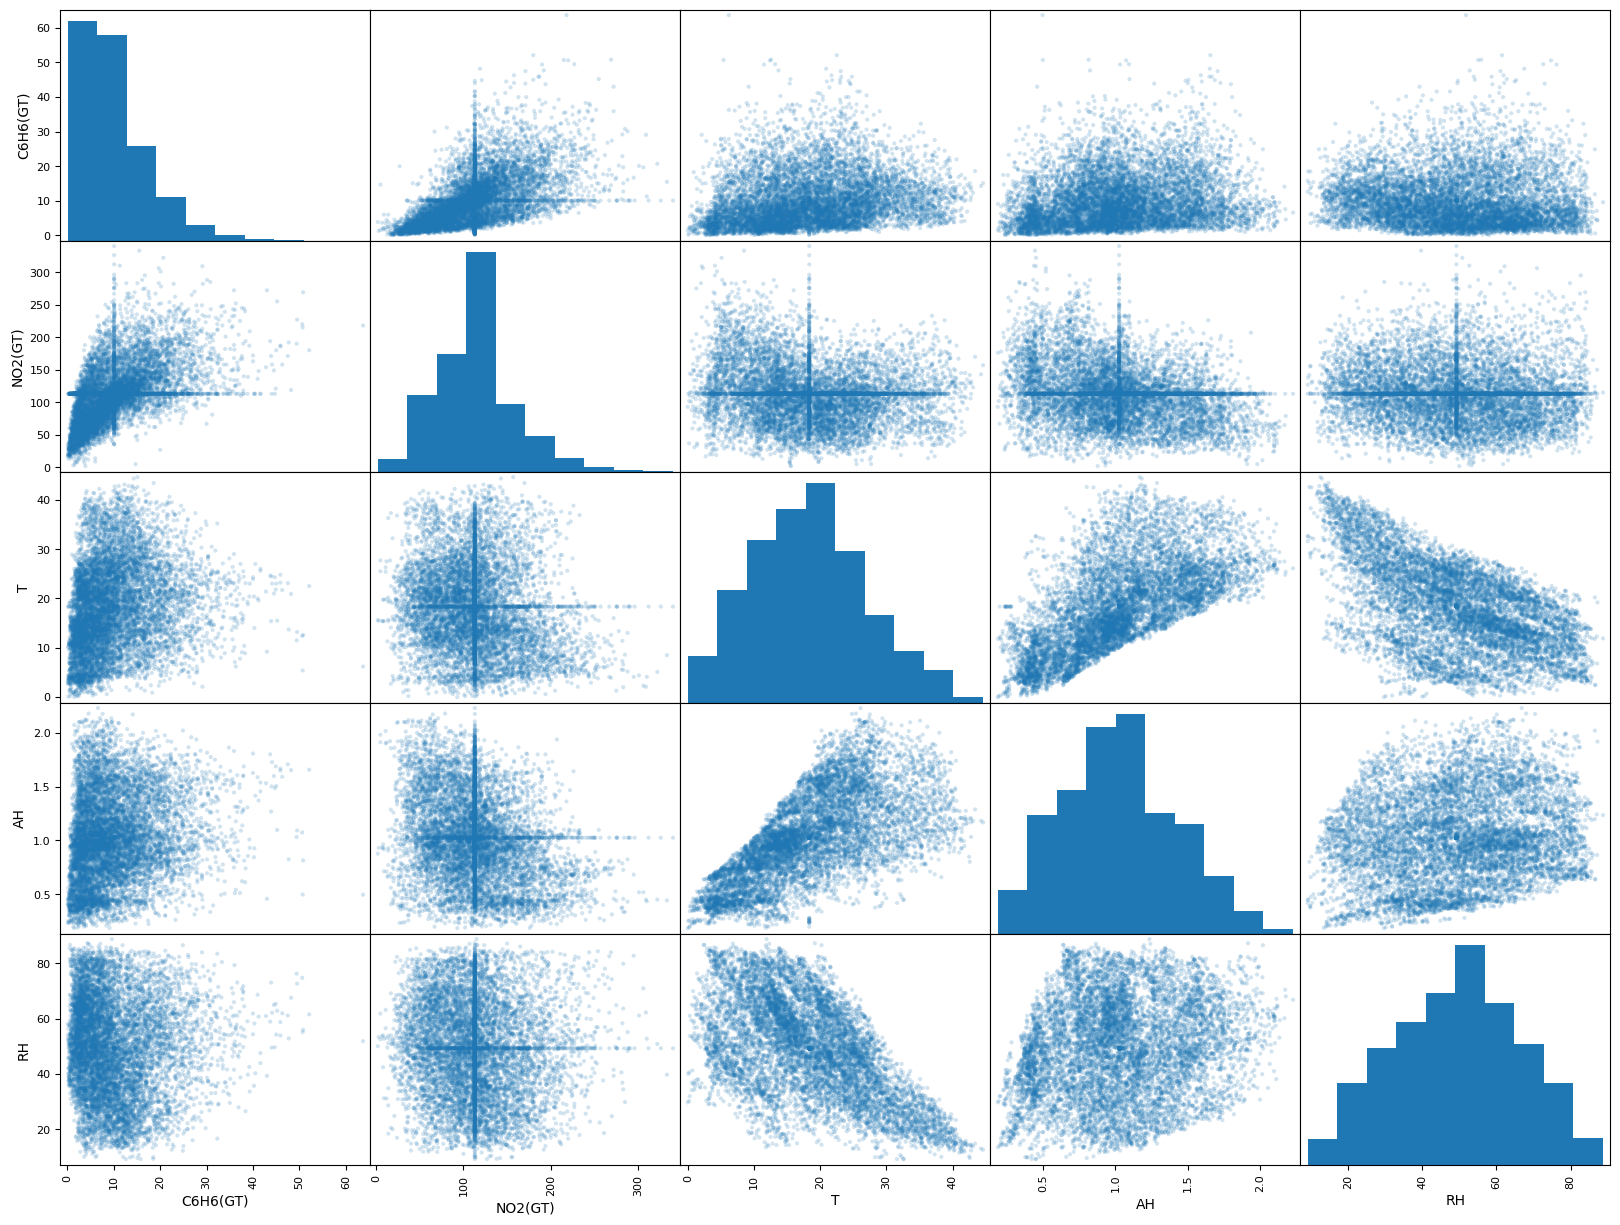

In [95]:
attributes = ["C6H6(GT)", "NO2(GT)","T", "AH", "RH"]
scatter_matrix (data[attributes], figsize=(20,15), alpha=0.2)

In [96]:
x = data.drop(['RH'],axis= 1)
y = data["RH"]
x_data = np.array(x)
y_data = np.array(y)

In [97]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, shuffle=True)
x_data= np.array(x_train)
y_data =  np.array(y_train)

In [98]:
model1 = LinearRegression()
model1.fit(x_data, y_data)

LinearRegression()

In [99]:
predicted1 = model1.predict(x_test)
error1 = mean_squared_error(y_test, predicted1)
np.sqrt(error1)

C:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


5.845350413985002

In [100]:
model2 = RandomForestRegressor()
model2.fit(x_data, y_data)



RandomForestRegressor()

In [101]:
predicted2 = model2.predict(x_test)
error2= mean_squared_error(y_test, predicted2)
np.sqrt(error2)

C:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


0.5515160163626616

In [102]:
model3 = DecisionTreeRegressor()
model3.fit(x_data, y_data)
predicted3 = model3.predict(x_test)

C:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(


In [103]:
error3 = mean_squared_error(y_test, predicted3)
np.sqrt(error3)

1.2193989341818208

In [104]:
model4 = ExtraTreesRegressor()
model4.fit(x_data,y_data)


ExtraTreesRegressor()

In [105]:
predicted4 = model4.predict(x_test)
error4 = mean_squared_error(y_test , predicted4)
np.sqrt(error4)

C:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but ExtraTreesRegressor was fitted without feature names
  warnings.warn(


0.4045572681666704

In [ ]:
# ExtraTreeRegressor is working perfectly, we will take it as a final model